<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/30_realQuantumComputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


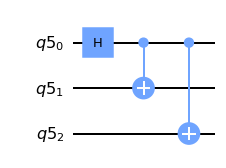

In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.draw('mpl')

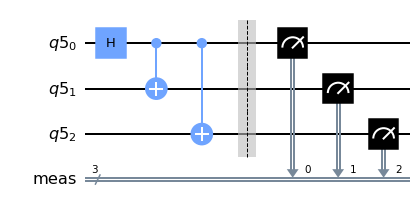

In [12]:
qc.measure_all()
qc.draw('mpl')

In [13]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 506, '111': 518}


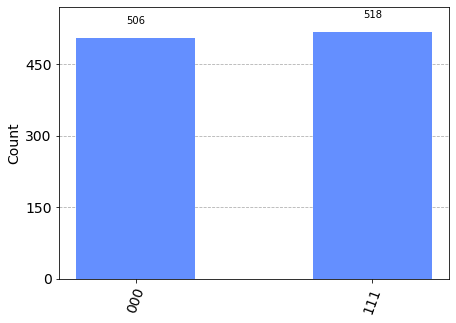

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [17]:
from qiskit import IBMQ
# The account is your API token as in https://quantum-computing.ibm.com
IBMQ.save_account('220d7ab48d5d58efe16828d629a01f4e07afaf81698a32e6415f3a2e1fd32313673675ff9132209687d27d521c9cbd537890b8a88bf216247e20aa514df1448b')
IBMQ.load_account()

configrc.store_credentials:WARNING:2023-01-05 18:48:34,804: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-05 18:48:35,077: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider('ibm-q')

In [19]:
# In the website, list Quantum Compute Resources and copy the name
# In this experiment we need 3 qubits, so ibmq_lima has 5 and suits it
qcomp = provider.get_backend('ibmq_lima') 

In [20]:
# Transpile the circuit to the real computer topology
qc_compiled = transpile(qc,qcomp)

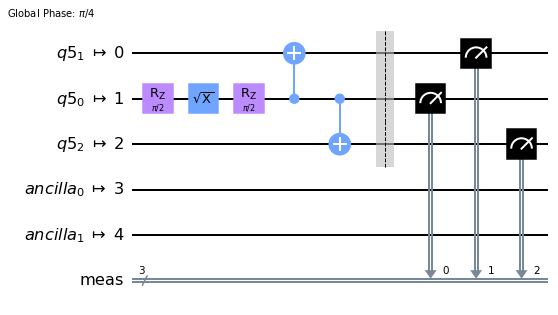

In [21]:
qc_compiled.draw('mpl')

In [22]:
import qiskit.tools.jupyter 
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [23]:
job = qcomp.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 505, '001': 4, '010': 11, '011': 25, '100': 7, '101': 25, '110': 13, '111': 434}


In [27]:
#IBMQ.job.cancel()

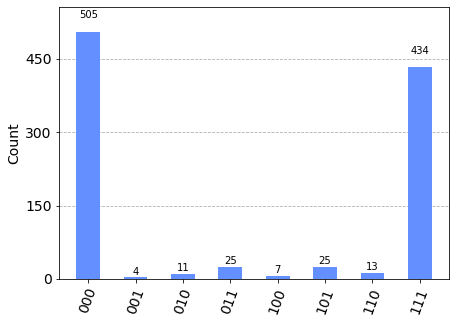

In [28]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)